In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

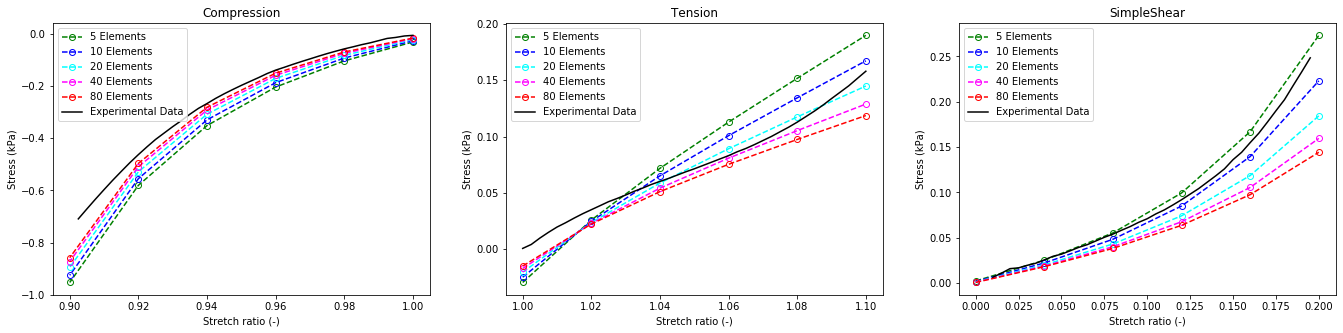

In [48]:
NumberofElements = [5, 10, 20, 40, 80]
Nelements = NumberofElements[0]

LoadingCases = ['Compression','Tension','SimpleShear']
LoadingCase = LoadingCases[0]

Figure, Axes = plt.subplots(1, 3, figsize=(23, 5))
Colors = ['Green','Blue','Cyan','Magenta','Red']
Markers = ['o','s','^','x']

# PLots
for ElementIndex in range(len(NumberofElements)):
    
    Nelements = NumberofElements[ElementIndex]
    
    for CaseIndex in range(len(LoadingCases)):
        
        LoadingCase = LoadingCases[CaseIndex]
        
        
        ExpFile = os.path.join('../ExperimentalData', 'CR_' + LoadingCase + '_ExpDat.csv')
        ExpData = pd.read_csv(ExpFile,header=None,names=['Stretch','Stress'],sep=';',decimal=',')
    
        File = os.path.join('Data', LoadingCase + str(Nelements) + '.csv')
        Data = pd.read_csv(File,usecols=[1,2])

        Axes[CaseIndex].plot(Data['Stretches'],Data['P'],color=Colors[ElementIndex],marker=Markers[0],fillstyle='none',linestyle='--',label=str(Nelements) +' Elements')
        if ElementIndex == len(NumberofElements)-1:
            Axes[CaseIndex].plot(ExpData['Stretch'],ExpData['Stress'],color='Black',label='Experimental Data')
        Axes[CaseIndex].legend(loc='upper left')
        
        
        Axes[CaseIndex].set_title(LoadingCase)
        Axes[CaseIndex].set_xlabel('Stretch ratio (-)')
        Axes[CaseIndex].set_ylabel('Stress (kPa)')

plt.savefig('Results/Sensitivity.pdf')
plt.show()